**Project-2 |** *APImon: Gotta fetch 'em all* - Enriching a dataset

**Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import kaleido

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
sns.set_style('whitegrid')

**Dataset**

In [4]:
pokedex = pd.read_csv('./data/pokemon_all_clean.csv')
pokedex

,#,Name,Weight (kg),Height (m),Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Catch rate,Generation,Legendary
0,1,Bulbasaur,6.9,0.7,Grass,Poison,318,45,49,49,65,65,45,45,1,False
1,2,Ivysaur,13.0,1.0,Grass,Poison,405,60,62,63,80,80,60,45,1,False
2,3,Venusaur,100.0,2.0,Grass,Poison,525,80,82,83,100,100,80,45,1,False
3,4,Charmander,8.5,0.6,Fire,NaN,309,39,52,43,60,50,65,45,1,False
4,5,Charmeleon,19.0,1.1,Fire,NaN,405,58,64,58,80,65,80,45,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,901,Ursaluna,290.0,2.4,Ground,Normal,550,130,140,105,45,80,50,75,8,False
884,902,Basculegion,110.0,3.0,Water,Ghost,530,120,112,65,80,75,78,135,8,False
885,903,Sneasler,43.0,1.3,Fighting,Poison,510,80,130,60,40,80,120,135,8,False
886,904,Overqwil,60.5,2.5,Dark,Poison,510,85,115,95,65,65,85,135,8,False


In [5]:
pokedex.dtypes

#                int64
Name            object
Weight (kg)    float64
Height (m)     float64
Type 1          object
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Catch rate       int64
Generation       int64
Legendary         bool
dtype: object

**To visualize:**
- Distribution of Pokémon by Generation
- Distribution of Pokémon by Type
- Relationship between Pokémon Type and Stats
- Relationship between Legendary, Total score and Catch rate
- Relationship between Weight, Height and Speed

# Have they always released the same amount of Pokémon?

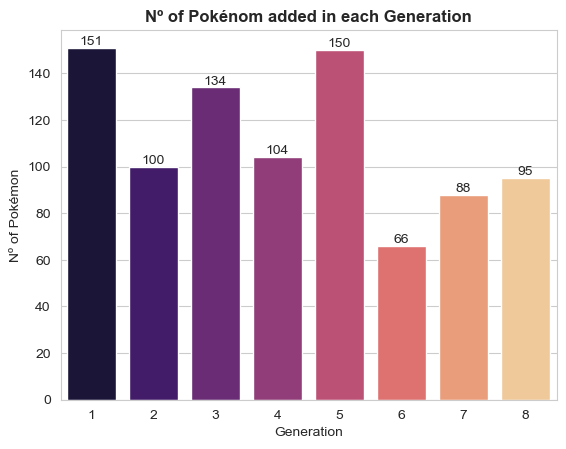

In [6]:
pokemon_generation = sns.countplot(x = "Generation", data = pokedex, palette = "magma")
pokemon_generation.bar_label(pokemon_generation.containers[0])
pokemon_generation.set(ylabel = 'Nº of Pokémon')
pokemon_generation.set_title('Nº of Pokénom added in each Generation', weight = "bold")
plt.show()

pokemon_generation.figure.savefig('./images/pokemon_by_generation.jpg', dpi=1000, bbox_inches='tight')

In [7]:
# counts_generation, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
# pokemon_generation = sns.countplot(x = "Generation", data = pokedex, palette = "magma", hue = "Legendary")
# pokemon_generation.bar_label(pokemon_generation.containers[0])
# pokemon_generation.bar_label(pokemon_generation.containers[1])
# pokemon_generation.set(ylabel = 'Nº of Pokémon')

# plt.show()

# Which Pokémon type do developers prefer?

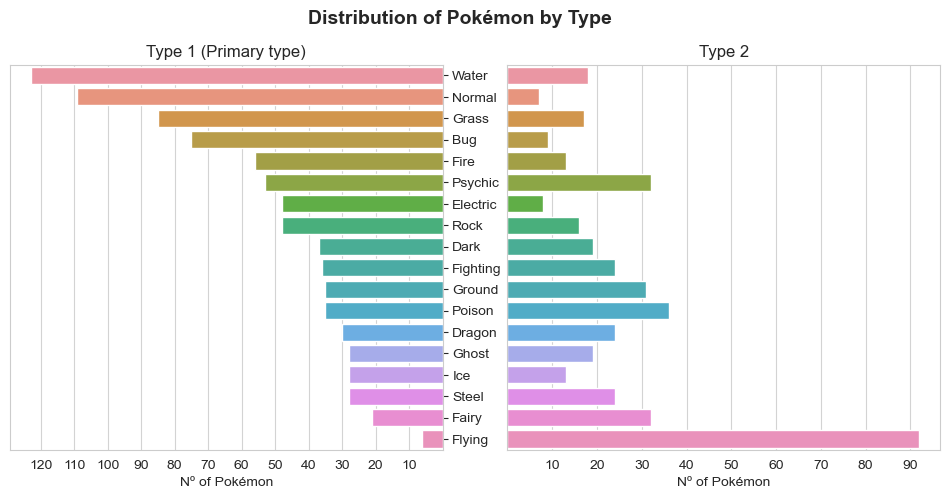

In [53]:
counts_type, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
counts_type.suptitle("Distribution of Pokémon by Type", fontsize=14, y = 0.99, weight ="bold")
counts_type.subplots_adjust(wspace=0.15)
axs[0].invert_xaxis()
axs[0].title.set_text('Type 1 (Primary type)')
axs[1].title.set_text('Type 2')

plt.setp(axs, xticks=range(10,130,10))

type_1 = sns.countplot(y ='Type 1', data=pokedex, order = pokedex['Type 1'].value_counts().index, ax = axs[0])
# type_1.bar_label(type_1.containers[0])
type_1.set(xlabel='Nº of Pokémon')
type_1.set_axisbelow(True)
type_1.xaxis.grid(color='lightgray')
# type_1.yaxis.grid(color='lightgray', linestyle='dashed')
type_1.set_ylabel("")
type_1.yaxis.tick_right()
#type_1.yaxis.set_label_position("left")

type_2 = sns.countplot(y ='Type 2', data=pokedex, order = pokedex['Type 1'].value_counts().index, ax = axs[1])
type_2.set(xlabel='Nº of Pokémon')
# type_2.bar_label(type_2.containers[0])
type_2.yaxis.set_label_position("right")
type_2.yaxis.tick_left()
type_2.axes.get_yaxis().set_ticks([])
type_2.set_axisbelow(True)
type_2.xaxis.grid(color='lightgray')
type_2.set_ylabel("")
type_2.yaxis.grid(color='lightgray', linestyle='dashed')

plt.show()

counts_type.figure.savefig('./images/pokemon_by_type.jpg', dpi=1000, bbox_inches='tight')

# Which Pokémon types should you include in your team?

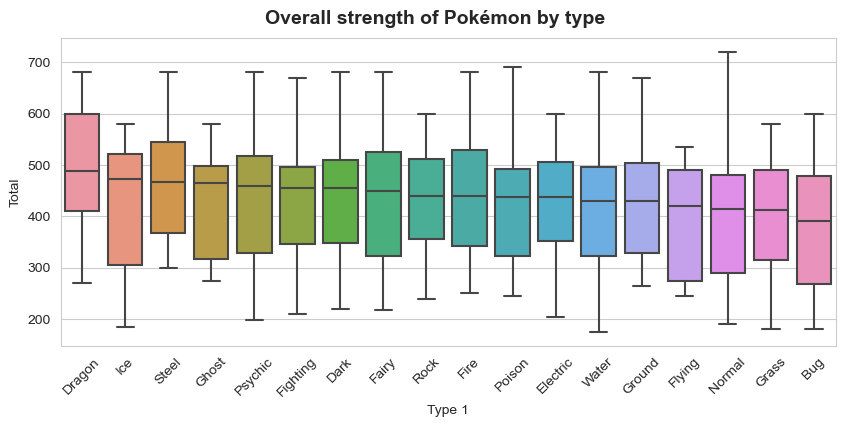

In [9]:
totalscore_type, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
totalscore_type.suptitle("Overall strength of Pokémon by type", fontsize=14, y = 0.95, weight = "bold")

my_order = pokedex.groupby("Type 1")['Total'].median().sort_values().iloc[::-1].index
total_type = sns.boxplot(x="Type 1", y="Total", data=pokedex, order = my_order)
plt.xticks(rotation=45)

plt.show()

totalscore_type.figure.savefig('./images/total_by_type.jpg', dpi=1000, bbox_inches='tight')

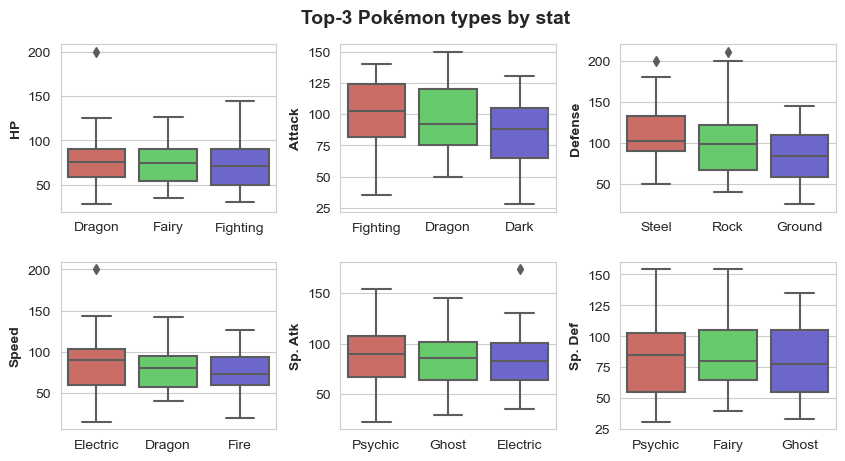

In [10]:
stats_type, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
stats_type.suptitle("Top-3 Pokémon types by stat", weight = 'bold', fontsize=14, y = 0.95)
stats_type.subplots_adjust(wspace=0.3, hspace=0.3)

# HP
HP = sns.boxplot(x="Type 1", y="HP", data=pokedex, 
                         order = pokedex.groupby("Type 1")['HP'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[0,0], palette = "hls")
plt.xticks(rotation=0)
HP.set_xlabel("")
HP.set_ylabel("HP", fontsize=10, weight = 'bold')

# Attack
attack = sns.boxplot(x="Type 1", y="Attack", data=pokedex, 
                         order = pokedex.groupby("Type 1")['Attack'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[0,1], palette = "hls")
plt.xticks(rotation=0)
attack.set_xlabel("")
attack.set_ylabel("Attack", fontsize=10, weight = 'bold')

# Defense
defense = sns.boxplot(x="Type 1", y="Defense", data=pokedex, 
                         order = pokedex.groupby("Type 1")['Defense'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[0,2], palette = "hls")
plt.xticks(rotation=0)
defense.set_xlabel("")
defense.set_ylabel("Defense", fontsize=10, weight = 'bold')

# Speed
speed = sns.boxplot(x="Type 1", y="Speed", data=pokedex, 
                         order = pokedex.groupby("Type 1")['Speed'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[1,0], palette = "hls")
plt.xticks(rotation=0)
speed.set_xlabel("")
speed.set_ylabel("Speed", fontsize=10, weight = 'bold')

# Atk. Sp
atksp = sns.boxplot(x="Type 1", y="Sp. Atk", data=pokedex, 
                         order = pokedex.groupby("Type 1")['Sp. Atk'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[1,1], palette = "hls")
plt.xticks(rotation=0)
atksp.set_xlabel("")
atksp.set_ylabel("Sp. Atk", fontsize=10, weight = 'bold')

# Def. Sp
defsp = sns.boxplot(x="Type 1", y="Sp. Def", data=pokedex, 
                         order = pokedex.groupby("Type 1")['Sp. Def'].median().sort_values().iloc[::-1][:3].index,
                    ax = axs[1,2], palette = "hls")
plt.xticks(rotation=0)
defsp.set_xlabel("")
defsp.set_ylabel("Sp. Def", fontsize=10, weight = 'bold')

plt.show()

stats_type.figure.savefig('./images/top3types_by_stats.jpg', dpi=1000, bbox_inches='tight')

In [11]:
# # Using a for loop
# stat = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
# stat_types, axs = plt.subplots(nrows=1, ncols=6, figsize=(10,5))

# for i, f in enumerate(stat):
#     sns.boxplot(x = "Type 1", y = stat, data = pokedex, ax = axs[i],
#                order = pokedex.groupby("Type 1")[f].median().sort_values().iloc[::-1][:3].index, palette = "hls")

# Are the most powerful or fastest Pokémon more difficult to catch?

In [12]:
# sns.set(rc = {'figure.figsize':(10,5)})
# sns.set_style('darkgrid')
# catchrate_total = sns.scatterplot(x="Total", y="Catch rate", hue="Legendary",data=pokedex, palette = "viridis")
# plt.show()

In [76]:
fig = px.scatter(pokedex, x = "Total", y = "Catch rate", color= "Legendary", size = "Speed",
                 hover_data = ['Name'], labels = {'x':'Weight (log scale)', 'y':'Height (log scale)'},
                title = "Relationship between Catch rate, Total score and Speed (as size)")
fig.update_layout(
    hoverlabel=dict(
        font_color="white"
    )
)

fig.show()

fig.write_image("./images/catchrate_total_speed.jpeg")
fig.write_html("./images/catchrate_total_speed.html")

# Is the size related to HP?

In [58]:
weight_log = np.log10(pokedex['Weight (kg)'])
height_log = np.log10(pokedex['Height (m)'])
fig = px.scatter(pokedex, x = weight_log, y = height_log, color= "Legendary", size = "HP",
                 hover_data = ['Name', 'Weight (kg)', 'Height (m)'], 
                 labels = {'x':'Weight (log scale)', 'y':'Height (log scale)'},
                title = "Relationship between Height, Weight, and HP (as size)")
fig.update_layout(
    hoverlabel=dict(
        font_color="white"
    )
)
fig.show()

fig.write_image("./images/weight_height_total.jpeg")
fig.write_html("./images/weight_height_total.html")

In [15]:
# sns.set(rc = {'figure.figsize':(10,5)})
# sns.set_style('darkgrid')
# weight_log = np.log10(pokedex['Weight (kg)'])
# height_log = np.log10(pokedex['Height (m)'])
# weight_height = sns.scatterplot(x = weight_log, y = height_log, hue = "Legendary", data = pokedex, palette = "viridis")
# weight_height.set(xlabel='Weight (log scale)', ylabel='Height (log scale)')
# plt.show()

# Is the size related to Catch rate?

In [82]:
weight_log = np.log10(pokedex['Weight (kg)'])
height_log = np.log10(pokedex['Height (m)'])
speed_log = np.log10(pokedex['Speed'])
fig = px.scatter(pokedex, x = weight_log, y = height_log, color= "Catch rate", size = "HP",
                 hover_data = ['Name'], 
                 labels = {'x':'Weight (log scale)', 'y':'Height (log scale)'},
                title = "Relationship between Height, Weight, Catch rate and HP (as size)",
                color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    hoverlabel=dict(
        font_color="white"
    )
)
fig.show()

fig.write_image("./images/speed_weight_HP.jpeg")
fig.write_html("./images/speed_weight_HP.html")

In [17]:
# sns.set(rc = {'figure.figsize':(10,5)})
# sns.set_style('darkgrid')
# weight_log = np.log10(pokedex['Weight (kg)'])
# speed_log = np.log10(pokedex['Speed'])
# weight_speed = sns.scatterplot(x = weight_log, y = speed_log, hue = "Legendary", data = pokedex, palette = "viridis")
# weight_speed.set(xlabel='Weight (log scale)', ylabel='Speed (log scale)')
# plt.show()

In [18]:
#sns.pairplot(data=pokedex, hue="Legendary")

# Correlation between categories

In [19]:
correlation = pokedex.filter(["Weight (kg)", "Height (m)", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Catch rate", "Generation", "Legendary"]).corr()
correlation

,Weight (kg),Height (m),Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Catch rate,Generation,Legendary
Weight (kg),1.000000,0.637398,0.453902,0.427799,0.400303,0.447119,0.209983,0.273079,0.025487,-0.287517,0.103278,0.332068
Height (m),0.637398,1.000000,0.513551,0.454605,0.384554,0.340862,0.345280,0.284398,0.212693,-0.295156,0.037612,0.294380
Total,0.453902,0.513551,1.000000,0.657598,0.719903,0.617534,0.708846,0.693588,0.534151,-0.720280,0.117239,0.437055
HP,0.427799,0.454605,0.657598,1.000000,0.469063,0.256258,0.374501,0.354550,0.175546,-0.468273,0.082732,0.265488
Attack,0.400303,0.384554,0.719903,0.469063,1.000000,0.467722,0.310222,0.217699,0.331354,-0.516873,0.140019,0.245538
Defense,0.447119,0.340862,0.617534,0.256258,0.467722,1.000000,0.197142,0.500057,-0.021803,-0.440830,0.081525,0.250599
Sp. Atk,0.209983,0.345280,0.708846,0.374501,0.310222,0.197142,1.000000,0.490267,0.414850,-0.520249,0.082782,0.346664
Sp. Def,0.273079,0.284398,0.693588,0.354550,0.217699,0.500057,0.490267,1.000000,0.195265,-0.493696,0.051615,0.336043
Speed,0.025487,0.212693,0.534151,0.175546,0.331354,-0.021803,0.414850,0.195265,1.000000,-0.391241,0.017987,0.277391
Catch rate,-0.287517,-0.295156,-0.720280,-0.468273,-0.516873,-0.440830,-0.520249,-0.493696,-0.391241,1.000000,-0.052548,-0.300734


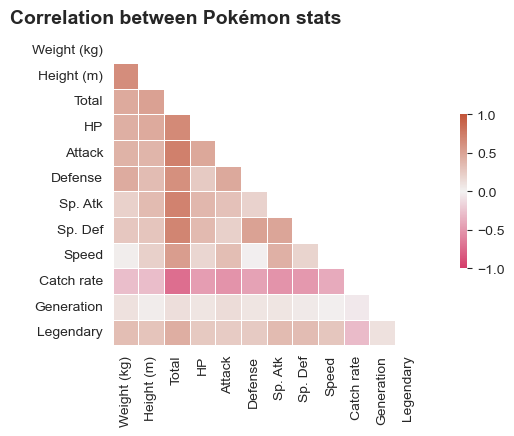

In [20]:
fig_corr, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
fig_corr.suptitle("Correlation between Pokémon stats", fontsize=14, y = 0.95, weight = "bold", ha= "center")

mask = np.triu(np.ones_like(correlation, dtype=bool)) 
color_map = sns.diverging_palette(0, 20, as_cmap=True)
sns.set_style('whitegrid')
fig_correlation = sns.heatmap(correlation,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);
fig_corr.figure.savefig('./images/pokemon_correlation.jpg', dpi=1000, bbox_inches='tight')